# April 21, 2025

In [15]:
# Imports.
from json import load, dump
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
with open('../data/preprocessed.json') as fp:
    data = load(fp)

## Start by normalizing the data

In [ ]:
normalized = {
    "byAffs"     : {
        "exp1" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "exp2" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0}
    },
    "byLevel"    : {
        "lvl_1"  : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "lvl_3"  : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "lvl_5"  : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "lvl_9"  : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "lvl_11" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "lvl_12" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0}
    },
    "byEncoding" : {
        "matrix" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "text"   : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0}
    },
    "byPrompt"   : {
        "base" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "cot"  : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0}
    },
    "byModel"    : {
        "llama3"   : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "qwen"     : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "deepseek" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0}
    },
}

standard_error = {
    "byAffs"     : {
        "exp1" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "exp2" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0}
    },
    "byLevel"    : {
        "lvl_1"  : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "lvl_3"  : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "lvl_5"  : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "lvl_9"  : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "lvl_11" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "lvl_12" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0}
    },
    "byEncoding" : {
        "matrix" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "text"   : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0}
    },
    "byPrompt"   : {
        "base" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "cot"  : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0}
    },
    "byModel"    : {
        "llama3"   : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "qwen"     : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0},
        "deepseek" : {"Resourcefulness" : 0, "Interaction" : 0, "Accuracy" : 0, "Completeness" : 0}
    },
}

for kk, vv in data.items():
    for k, v in vv.items():
        for metric in ['Resourcefulness', 'Interaction', 'Accuracy', 'Completeness']:

            succ_rate = v[metric] / float(v['Total'])

            normalized[kk][k][metric] = succ_rate
            standard_error[kk][k][metric] = np.sqrt(succ_rate * (1 - succ_rate) / float(v['Total']))

## Define Some Stuff

In [10]:
kk2option = {
    'byAffs'     : 'NLWM Usage',
    'byLevel'    : 'Puzzle Difficulty',
    'byEncoding' : 'Encoding Method',
    'byPrompt'   : 'Prompting Technique',
    'byModel'    : 'Model'
}
option2display = {
    'exp1' : "Without NLWM",
    'exp2' : "With NLWM",
    'lvl_1' : "lvl_1",
    'lvl_3' : "lvl_3",
    'lvl_5' : "lvl_5",
    'lvl_9' : "lvl_9",
    'lvl_11' : "lvl_11",
    'lvl_12' : "lvl_12",
    'matrix' : 'Matrix Representation',
    'text' : 'Text Description',
    'base' : 'Zero-Shot',
    'cot' : 'Chain of Thought',
    'llama3' : 'Llama3 : 70b',
    'qwen' : 'Qwen2.5 : 14b',
    'deepseek' : 'DeepSeek-R1 : 8b',
}

## Visualize

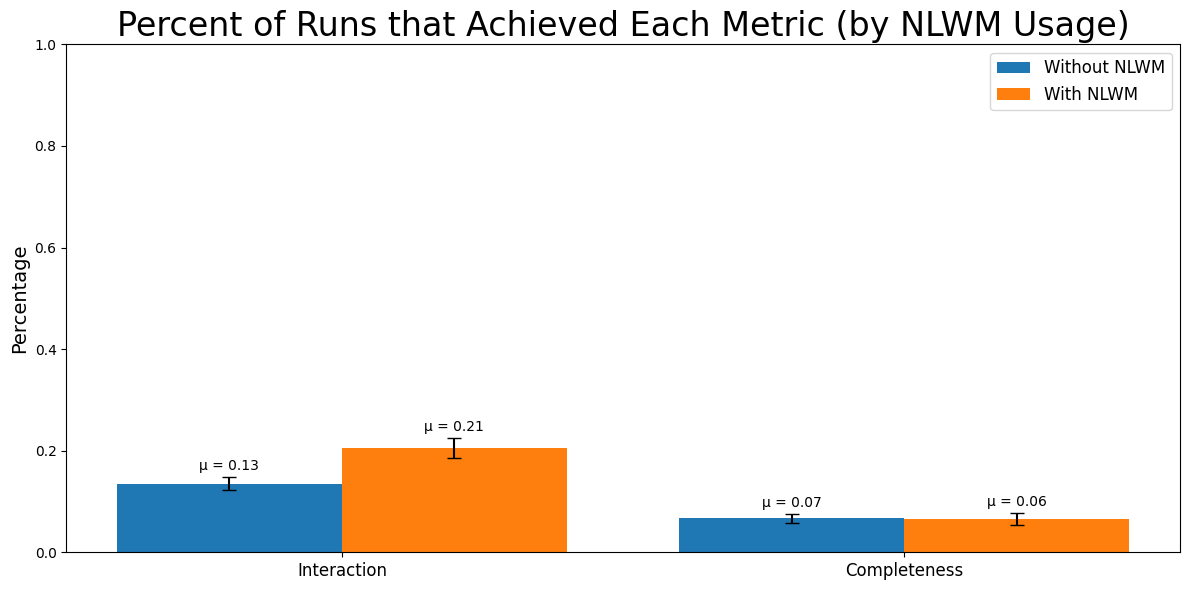

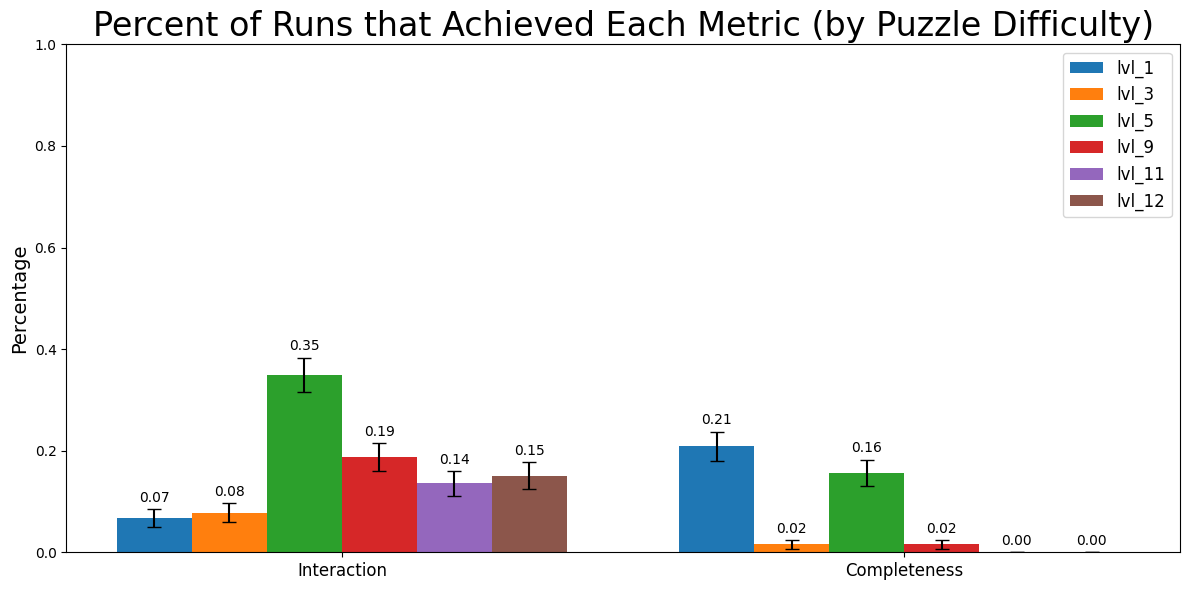

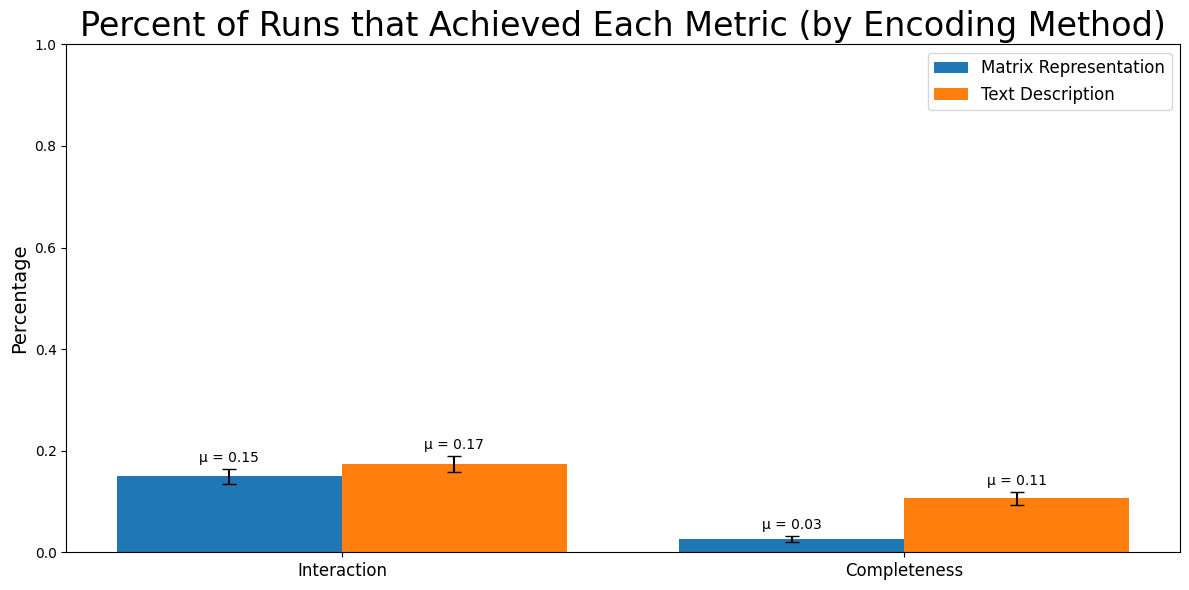

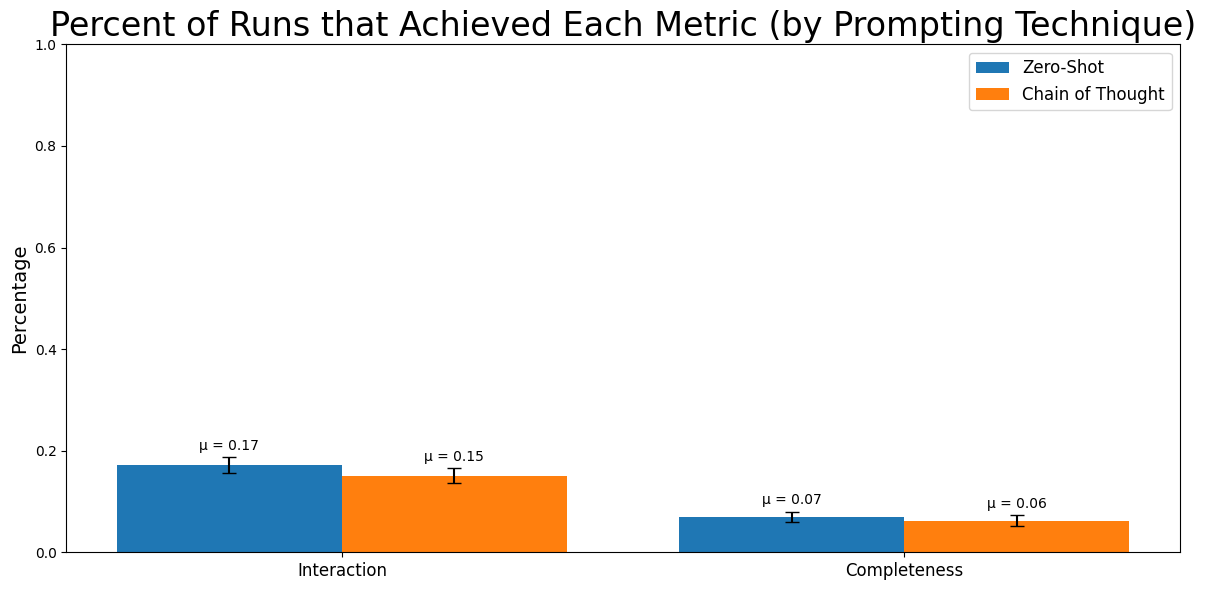

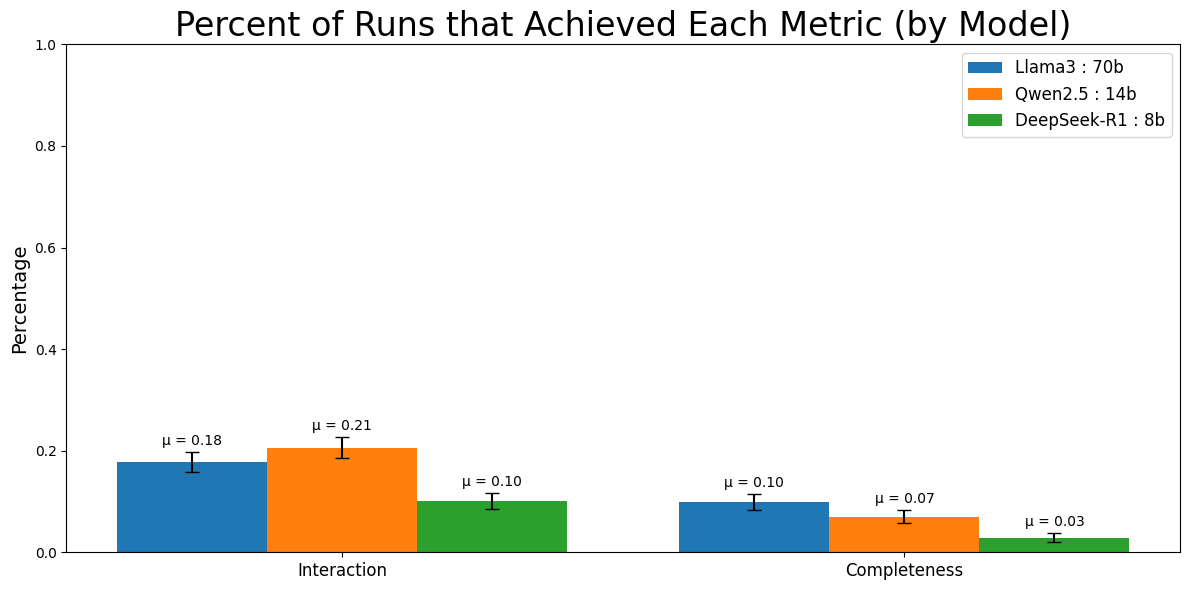

In [19]:
for kk, vv in normalized.items():
    metrics = ['Interaction', 'Completeness']
    options = list(vv.keys())

    # Initialize dictionaries to store values and errors by metric
    data_by_metric = {metric: [] for metric in metrics}
    error_by_metric = {metric: [] for metric in metrics}

    for option in options:
        for metric in metrics:
            data_by_metric[metric].append(normalized[kk][option][metric])
            error_by_metric[metric].append(standard_error[kk][option][metric])

    x = np.arange(len(metrics))  # one group per metric
    width = 0.8 / len(options)   # make total group width ~0.8

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, option in enumerate(options):
        values = [data_by_metric[metric][i] for metric in metrics]
        errors = [error_by_metric[metric][i] for metric in metrics]

        rects = ax.bar(
            x + i * width,
            values,
            width,
            yerr=errors,
            capsize=5,
            label=option2display[option]
        )

        # ax.bar_label(
        #     rects,
        #     padding=3,
        #     fmt='%.2f'
        # )

        if kk != 'byLevel':
            ax.bar_label(
                rects,
                labels=[f'μ = {val:.2f}' for val in values],
                padding=3,
                fontsize=10
            )
        else:
            ax.bar_label(
                rects,
                padding=3,
                fmt='%.2f',
                fontsize=10
            )


    # Set labels, ticks, legend
    ax.set_ylabel('Percentage', fontsize=14)
    ax.set_title(f'Percent of Runs that Achieved Each Metric (by {kk2option[kk]})', fontsize=24)
    ax.set_xticks(x + width * (len(options) - 1) / 2)
    ax.set_xticklabels(metrics, fontsize=12)
    ax.legend(fontsize=12)
    ax.set_ylim(0, 1)

    plt.tight_layout()
    plt.show()


Completion errors (rl): [0.0, 0.017853571071357127, 0.0, 0.020712315177207976, 0.0, 0.0]


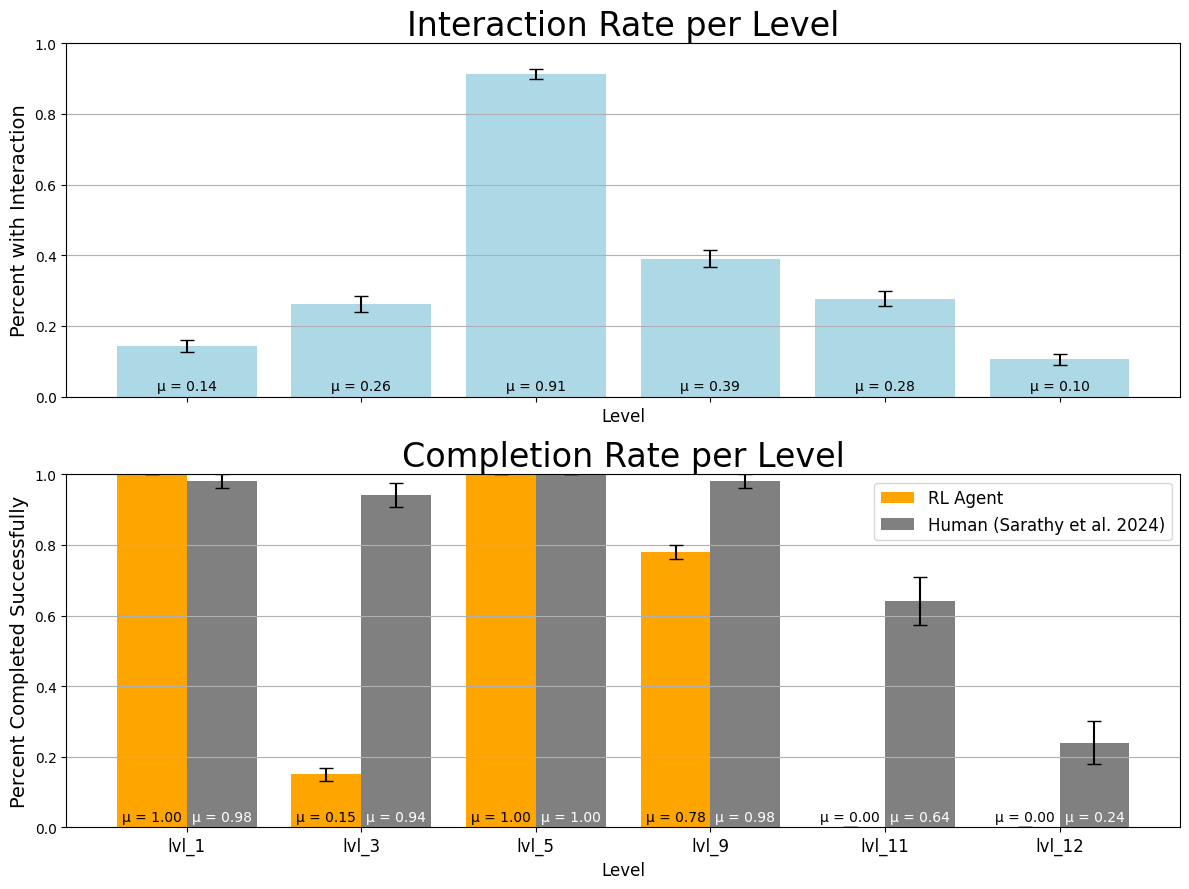

In [ ]:
# Load JSON data
with open('rl_data/rl_processed_stricter.json') as f:
    data = load(f)
with open('human_data/human_completion.json') as f:
    human_data = load(f)
# with open('lvl5_llmData/lvl5_preprocessed_focused2.json') as f:
#     llm_data = load(f)

# Prepare data
levels = ['lvl_1', 'lvl_3', 'lvl_5', 'lvl_9', 'lvl_11', 'lvl_12']
normalized_interactions = [data[lvl]["Interaction"] / data[lvl]["Total"] for lvl in levels]
se_interactions = [
    np.sqrt((data[lvl]["Interaction"] / data[lvl]["Total"]) * (1.0 - (data[lvl]["Interaction"] / data[lvl]["Total"])) / data[lvl]["Total"])
    for lvl in levels
]
normalized_completions = [data[lvl]["Completeness"] / data[lvl]["Total"] for lvl in levels]
se_completions = [
    np.sqrt((data[lvl]["Completeness"] / data[lvl]["Total"]) * (1.0 - (data[lvl]["Completeness"] / data[lvl]["Total"])) / data[lvl]["Total"])
    for lvl in levels
]
print(f"Completion errors (rl): {se_completions}")
human_completions = [human_data[lvl]['mean'] for lvl in levels]
human_error = [human_data[lvl]['std'] / np.sqrt(50) for lvl in levels]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

# Top graph: Interaction
bars = ax1.bar(
    levels,
    normalized_interactions,
    yerr=se_interactions,
    capsize=5,
    color='lightblue'
)
ax1.set_title('Interaction Rate per Level', fontsize=24)
ax1.set_ylabel('Percent with Interaction', fontsize=14)
ax1.set_xlabel('Level', fontsize=12)
ax1.set_ylim(0, 1)
ax1.grid(axis='y')

# Add μ = {value} label below each bar
for bar, value in zip(bars, normalized_interactions):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        0.05,  # slightly below 0 on y-axis
        f'μ = {value:.2f}',
        ha='center',
        va='top',
        fontsize=10,
        rotation=0
    )

# Bottom graph: Completion (Grouped bar chart)
bar_width = 0.4
x = range(len(levels))
bars2a = ax2.bar(
    [i - bar_width/2 for i in x],
    normalized_completions,
    yerr=se_completions,
    capsize=5,
    width=bar_width,
    label='RL Agent',
    color='orange'
)
bars2b = ax2.bar(
    [i + bar_width/2 for i in x],
    human_completions,
    yerr=human_error,
    capsize=5,
    width=bar_width,
    label='Human (Sarathy et al. 2024)',
    color='gray'
)

for bar, value in zip(bars2a, normalized_completions):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        0.05,  # slightly below 0 on y-axis
        f'μ = {value:.2f}',
        ha='center',
        va='top',
        fontsize=10,
        rotation=0
    )
for bar, value in zip(bars2b, human_completions):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        0.05,  # slightly below 0 on y-axis
        f'μ = {value:.2f}',
        ha='center',
        va='top',
        fontsize=10,
        rotation=0,
        color='white'
    )

ax2.set_title('Completion Rate per Level', fontsize=24)
ax2.set_ylabel('Percent Completed Successfully', fontsize=14)
ax2.set_xlabel('Level', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(levels, fontsize=12)
ax2.set_ylim(0, 1)
ax2.grid(axis='y')
ax2.legend(fontsize=12)

plt.tight_layout()
plt.show()

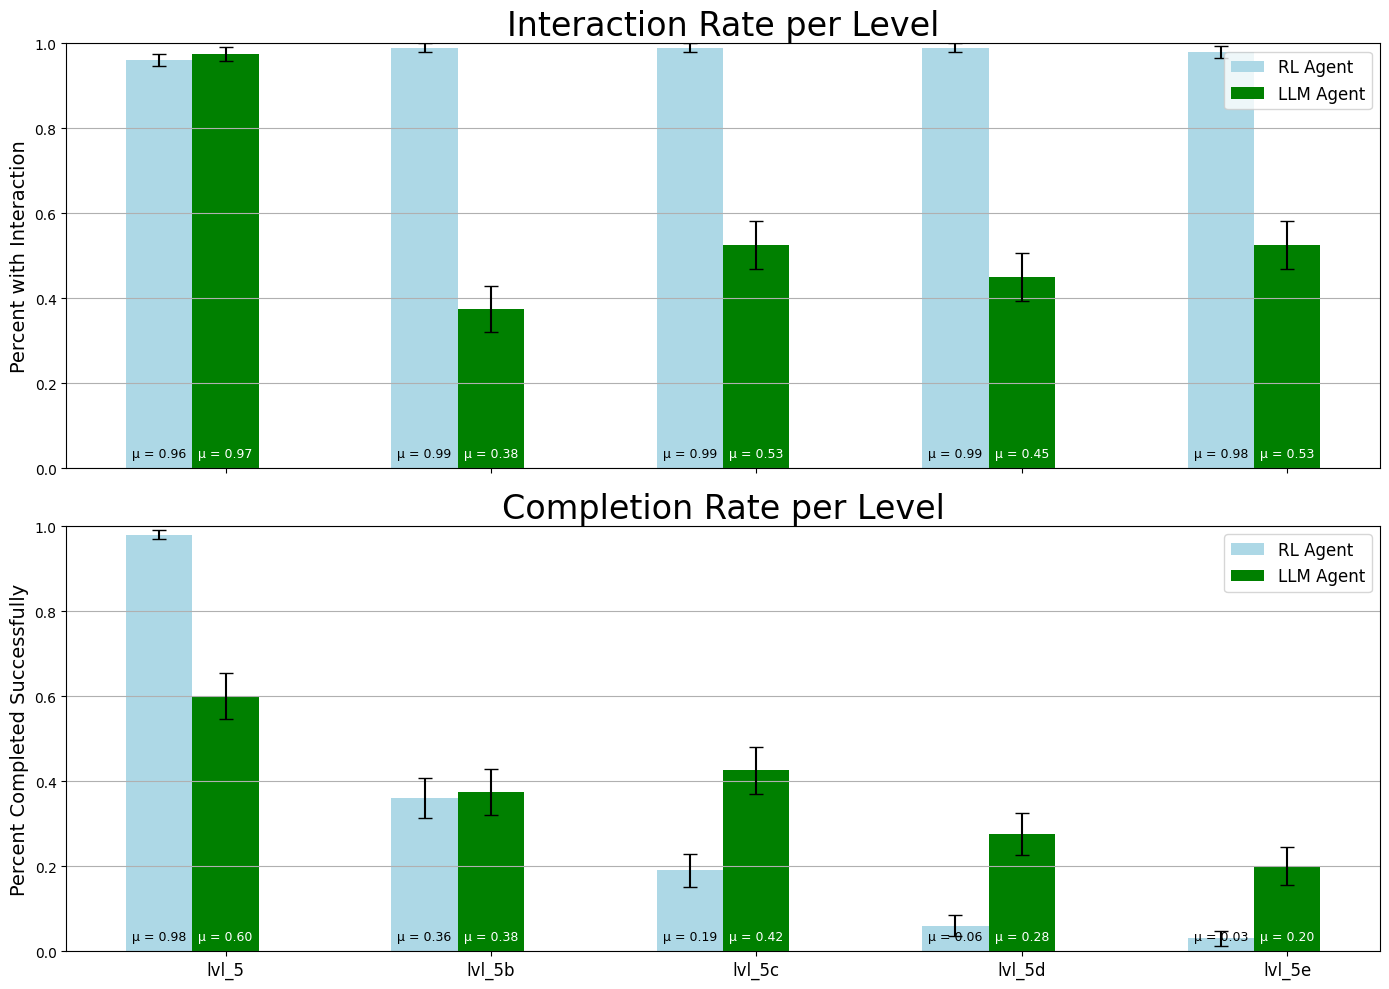

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from json import load

# Load JSON data
with open('rl_data/lvl5_processed_RL.json') as f:
    data = load(f)
# with open('human_data/human_completion.json') as f:
#     human_data = load(f)
with open('lvl5_llmData/lvl5_preprocessed_focused2.json') as f:
    llm_data = load(f)

# Prepare data
levels = ['lvl_5', 'lvl_5b', 'lvl_5c', 'lvl_5d', 'lvl_5e']
# RL agent
normalized_interactions = [data[lvl]["Interaction"] / data[lvl]["Total"] for lvl in levels]
se_interactions = [
    np.sqrt((data[lvl]["Interaction"] / data[lvl]["Total"]) * (1.0 - (data[lvl]["Interaction"] / data[lvl]["Total"])) / data[lvl]["Total"])
    for lvl in levels
]
normalized_completions = [data[lvl]["Completeness"] / data[lvl]["Total"] for lvl in levels]
se_completions = [
    np.sqrt((data[lvl]["Completeness"] / data[lvl]["Total"]) * (1.0 - (data[lvl]["Completeness"] / data[lvl]["Total"])) / data[lvl]["Total"])
    for lvl in levels
]

# # Human
# human_completions = [human_data[lvl]['mean'] for lvl in levels]
# human_error = [human_data[lvl]['std'] / np.sqrt(50) for lvl in levels]

# LLM agent
llm_interactions = [llm_data[lvl]["Interaction"] / llm_data[lvl]["Total"] for lvl in levels]
llm_se_interactions = [
    np.sqrt((llm_data[lvl]["Interaction"] / llm_data[lvl]["Total"]) * (1.0 - (llm_data[lvl]["Interaction"] / llm_data[lvl]["Total"])) / llm_data[lvl]["Total"])
    for lvl in levels
]
llm_completions = [llm_data[lvl]["Completeness"] / llm_data[lvl]["Total"] for lvl in levels]
llm_se_completions = [
    np.sqrt((llm_data[lvl]["Completeness"] / llm_data[lvl]["Total"]) * (1.0 - (llm_data[lvl]["Completeness"] / llm_data[lvl]["Total"])) / llm_data[lvl]["Total"])
    for lvl in levels
]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Top graph: Interaction (Grouped bar chart)
bar_width = 0.25
x = np.arange(len(levels))

bars1_rl = ax1.bar(
    x - bar_width,
    normalized_interactions,
    yerr=se_interactions,
    capsize=5,
    width=bar_width,
    label='RL Agent',
    color='lightblue'
)
bars1_llm = ax1.bar(
    x,
    llm_interactions,
    yerr=llm_se_interactions,
    capsize=5,
    width=bar_width,
    label='LLM Agent',
    color='green'
)

ax1.set_title('Interaction Rate per Level', fontsize=24)
ax1.set_ylabel('Percent with Interaction', fontsize=14)
ax1.set_ylim(0, 1)
ax1.grid(axis='y')
ax1.legend(fontsize=12)

# μ labels for interaction
for bar, value in zip(bars1_rl, normalized_interactions):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        0.05,
        f'μ = {value:.2f}',
        ha='center',
        va='top',
        fontsize=9
    )
for bar, value in zip(bars1_llm, llm_interactions):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        0.05,
        f'μ = {value:.2f}',
        ha='center',
        va='top',
        fontsize=9,
        color='white'
    )

# Bottom graph: Completion (Grouped bar chart)
bars2_rl = ax2.bar(
    x - bar_width,
    normalized_completions,
    yerr=se_completions,
    capsize=5,
    width=bar_width,
    label='RL Agent',
    color='lightblue'
)
bars2_llm = ax2.bar(
    x,
    llm_completions,
    yerr=llm_se_completions,
    capsize=5,
    width=bar_width,
    label='LLM Agent',
    color='green'
)
# bars2_human = ax2.bar(
#     x + bar_width,
#     human_completions,
#     yerr=human_error,
#     capsize=5,
#     width=bar_width,
#     label='Human (Sarathy et al. 2024)',
#     color='gray'
# )

# μ labels for completion
for bar, value in zip(bars2_rl, normalized_completions):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        0.05,
        f'μ = {value:.2f}',
        ha='center',
        va='top',
        fontsize=9
    )
for bar, value in zip(bars2_llm, llm_completions):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        0.05,
        f'μ = {value:.2f}',
        ha='center',
        va='top',
        fontsize=9,
        color='white'
    )
# for bar, value in zip(bars2_human, human_completions):
#     ax2.text(
#         bar.get_x() + bar.get_width() / 2,
#         0.05,
#         f'μ = {value:.2f}',
#         ha='center',
#         va='top',
#         fontsize=9,
#         color='white'
#     )

ax2.set_title('Completion Rate per Level', fontsize=24)
ax2.set_ylabel('Percent Completed Successfully', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels(levels, fontsize=12)
ax2.set_ylim(0, 1)
ax2.grid(axis='y')
ax2.legend(fontsize=12)

plt.tight_layout()
plt.show()
